# Twitter did not come back on my Academic research application.
# So I proceeded to work with the Archive analysis from
# kaggle

In [3]:
# sc master - running locally
sc.master

'local[*]'

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
%pylab inline
import os
import pyspark

# spark is from the previous example.
sc = spark.sparkContext

Populating the interactive namespace from numpy and matplotlib


In [106]:
from dotenv import dotenv_values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import warnings
import gzip
import json
import os
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
%matplotlib inline

In [ ]:
# ittertools required for reading the gzip files but is depricated in pandas 2.0
# pip install pandas==1.5.3


In [55]:
print(pd.__version__)

1.5.3


In [ ]:
# pull in one tweet file to inspect
# see the tweets are from all over the place.
#some of these are ukraine regions , need to capture these at a later date##############################
item_count = df['location'].value_counts()
print(item_count)

In [45]:
# Set up empty pyspark dataframe to store the imported tweets
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType,TimestampType

spark = SparkSession.builder.getOrCreate() #Start a spark session
# Defining the schema of the pyspark dataframe
schema = StructType([
    StructField("date_extracted", TimestampType(), True),
    StructField("tweet", StringType(), True)
])
stwit_df = spark.createDataFrame([], schema) # make empty dataframe
# show the dataframe is as set out
stwit_df.show()


+--------------+-----+
|date_extracted|tweet|
+--------------+-----+
+--------------+-----+



In [46]:
# Function to extract tweets from gzip file , filter and store out to pyspark dataframe

def extract_csv_from_directory(directory, stwit_df):
    """Function to unzip and extract all json all files in a given directory"""

    for file_name in os.listdir(directory):
        if file_name.endswith('.csv.gzip'):
            print(f"Extracting file {file_name} ")
            file_path = os.path.join(directory, file_name)
            with gzip.open(file_path, 'r') as file:
                df = pd.read_csv(file) #read the file as a pandas dataframe
                filter1 = (df['language'] == 'en') & (df['location'] == 'Ukraine') # a filter for english language and location Ukraine
                df = df[filter1] # Selects dataframe based on the filter
                df = df[['extractedts','text']] # outputs only the columns im looking for date and text
                # convert datetime to date object to avoid 'NonExistantTimeError' due to daylight saving changes. 
                df['extractedts'] = pd.to_datetime(df['extractedts'], errors='ignore').dt.date
                df['text'] = df['text'].astype(str) # convert string to string object
                sdf = spark.createDataFrame(df) # convert pandas DF to PySpark DF
                stwit_df = stwit_df.union(sdf) # append the result to my PySpark DF
       

    return stwit_df


directory = "/media/hduser/TOSHIBA_EXT/archive_copy"
cbdf = extract_csv_from_directory(directory,stwit_df)
cbdf.show()


Extracting file 0401_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0402_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0403_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0404_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0405_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0406_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0407_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0408_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0409_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0410_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0411_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0412_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0413_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0414_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0415_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0416_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0417_UkraineCombinedTwee

Extracting file UkraineCombinedTweetsDeduped_FEB27.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_FEB28_part1.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_FEB28_part2.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_MAR01.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_MAR02.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_MAR03.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_MAR04.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_MAR05.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_MAR06.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_MAR07.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_MAR08.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_MAR09.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_MAR10.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_MAR11.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_MAR12.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_MAR13.csv.gzip 
Extracting f

Extracting file 1130_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1201_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1202_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1203_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1204_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1205_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1206_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1207_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1208_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1209_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1210_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1211_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1212_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1213_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1214_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1215_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1216_UkraineCombinedTwee

Extracting file 20230410_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230411_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230412_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230413_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230414_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230415_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230416_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230417_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230418_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230419_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230420_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230421_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230422_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230423_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230424_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230425_UkraineCombined

2023-05-23 19:12:32,217 WARN scheduler.DAGScheduler: Broadcasting large task binary with size 2.1 MiB
2023-05-23 19:12:33,257 WARN scheduler.DAGScheduler: Broadcasting large task binary with size 2.1 MiB


+-------------------+--------------------+
|     date_extracted|               tweet|
+-------------------+--------------------+
|2022-04-01 00:00:00|❗️🏫Every school ...|
|2022-04-01 00:00:00|One year ago #Ukr...|
|2022-04-01 00:00:00|JUST IN: #Anonymo...|
|2022-04-01 00:00:00|Chernihiv oblast....|
|2022-04-01 00:00:00|⚡The Ukrainian Ai...|
|2022-04-01 00:00:00|Help to save Ukra...|
|2022-04-01 00:00:00|Help to save Ukra...|
|2022-04-01 00:00:00|✨ Angelina Jolie ...|
|2022-04-01 00:00:00|This is not the t...|
|2022-04-01 00:00:00|#notallrussians??...|
|2022-04-01 00:00:00|⚡The Ukrainian Ai...|
|2022-04-01 00:00:00|🇬🇧🇺🇦How is th...|
|2022-04-01 00:00:00|Grandmother with ...|
|2022-04-01 00:00:00|An activist with ...|
|2022-04-01 00:00:00|⚡The Ukrainian Ai...|
|2022-04-01 00:00:00|The first leader ...|
|2022-04-01 00:00:00|The greatest army...|
|2022-04-01 00:00:00|Ukrainian army so...|
|2022-04-01 00:00:00|1/ Before tomorro...|
|2022-04-01 00:00:00|#Latvia has banne...|
+---------------

In [48]:
print(f'Count of rows:{cbdf.count()}')

2023-05-23 22:08:40,220 WARN scheduler.DAGScheduler: Broadcasting large task binary with size 1554.7 KiB


Count of rows:372497


In [49]:
print(f'Count of distinct rows: {cbdf.distinct().count()}')

2023-05-23 22:10:16,722 WARN scheduler.DAGScheduler: Broadcasting large task binary with size 2.0 MiB
2023-05-23 22:11:19,522 WARN scheduler.DAGScheduler: Broadcasting large task binary with size 1029.3 KiB


Count of distinct rows: 299821


In [50]:
# There are 72676 duplicate row
cbdf = cbdf.dropDuplicates()

In [52]:
# save the file to Hadoop HDFS
cbdf.write.parquet('hdfs://localhost:9000/user1/Ukraine_twitter.parquet')

AnalysisException: path hdfs://localhost:9000/user1/Ukraine_twitter.parquet already exists.

In [54]:
cbdf.write.csv('hdfs://localhost:9000/user1/Ukraine_twitter.csv')

2023-05-24 09:07:21,407 WARN scheduler.DAGScheduler: Broadcasting large task binary with size 2.0 MiB
2023-05-24 09:08:19,770 WARN scheduler.DAGScheduler: Broadcasting large task binary with size 1190.8 KiB


In [40]:
print(f'Number of rows with missing values : {df.isnull().any(axis=1).mean()}')

Number of rows with missing values : 0.0


# twitter sentiment analysis

In [58]:
import nltk
from dotenv import dotenv_values
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [59]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/hduser/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [63]:
# im working with my saved csv file here as it works better with nltk and textblob
pdf = cbdf.toPandas()

2023-05-24 11:08:17,179 WARN scheduler.DAGScheduler: Broadcasting large task binary with size 2.0 MiB
2023-05-24 11:09:16,910 WARN scheduler.DAGScheduler: Broadcasting large task binary with size 1025.9 KiB


In [64]:
# using regular expressions to remove all special charecters.
pdf["tweet"] = pdf['tweet'].str.replace('[^\w\s]','')

In [65]:
# using regular expressions to remove all tabs and carrige returns that were imported in original csv
pdf["tweet"] = pdf['tweet'].str.replace(r'\r\n','')

In [77]:
# Basically stop words like this, an, a, the, etc that do not affect the meaning of the tweet will be removed
from nltk.corpus import stopwords
stop = stopwords.words("english")

In [68]:
pdf['tweet'] = pdf['tweet'].astype(str)

In [70]:
# lambda counts the  number of stop words in each tweet
pdf["stopwords"]  = pdf["tweet"].apply(lambda x : len([x for x in x.split() if x in stop]))

In [72]:
# lambda counts the number of upper case words in tweet , indicate shouting , anger ect
pdf["upper"]  = pdf["tweet"].apply(lambda x : len([x for x in x.split() if x.isupper()]))

In [78]:
pdf['tweet'] = pdf['tweet'].astype(str)

In [79]:
##################### Warning this cell can take up to 50 mins to complete ################### 
# corrects spellings and grammer based on context
# use txtblob to correct the tweet spelling
from textblob import TextBlob
pdf['tweets_correct']= pdf["tweet"].apply(lambda x : str(TextBlob(x).correct()))
# pattern matching is not good

KeyboardInterrupt: 

In [83]:
pdf.head()

,date_extracted,tweet,stopwords,upper,sentiment
0,2022-04-01,USA russians have damaged at least six granari...,3,1,-0.30
1,2022-04-01,Japan freezes assets of 4 more russian organis...,4,0,0.25
2,2022-04-01,The War in childrens eyes\nTHE WAR THE VICTORY...,1,7,0.00
3,2022-04-01,ampquotWe managed to take a cat children pan...,11,0,0.00
4,2022-04-01,The War in childrens eyes\nTHE WAR THE VICTORY...,1,7,0.00


In [81]:
pdf['sentiment'] = pdf['tweet'].apply(lambda x : TextBlob(x).sentiment[0])

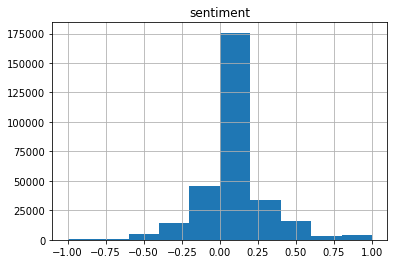

In [85]:
# Get instant view of the sentiment
pdf.hist(column='sentiment')
plt.savefig("ukraine_sent_hist.png", dpi=300)
plt.show();

In [101]:
# group by date and add up the sentiment score in each group.
# devide the sentiment score by the number of tweets in each day for the average sentiment score for that day
# create new dataset with the sentiment for each day.
tsdf = pdf.groupby('date_extracted').agg(sum_sentiment=('sentiment', 'sum'), rows = ('sentiment','count')
                                        ).assign(result=lambda x : x['sum_sentiment'] / x['rows']).reset_index()[['date_extracted', 'result']]

In [102]:
tsdf.head()

,date_extracted,result
0,2022-02-24,0.022676
1,2022-02-25,0.021433
2,2022-02-26,0.053351
3,2022-02-27,0.035189
4,2022-02-28,0.025210


In [104]:
tsdf['date_extracted'] = pd.to_datetime(tsdf['date_extracted'])
tsdf.set_index('date_extracted',inplace=True)

In [105]:
tsdf.head()

,result
date_extracted,
2022-02-24,0.022676
2022-02-25,0.021433
2022-02-26,0.053351
2022-02-27,0.035189
2022-02-28,0.025210


In [ ]:
plt.ylabel()

In [99]:
tsdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 448 entries, 2022-02-24 to 2023-05-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   result  448 non-null    float64
dtypes: float64(1)
memory usage: 7.0 KB


# Time series analysis

In [119]:
# pip install statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

#relax the display limits on columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [97]:
tsdf['date_extracted'] = pd.to_datetime(tsdf['date_extracted'])
tsdf.set_index('date_extracted',inplace=True)

In [100]:
tsdf.head()

,result
date_extracted,
2022-02-24,0.022676
2022-02-25,0.021433
2022-02-26,0.053351
2022-02-27,0.035189
2022-02-28,0.025210


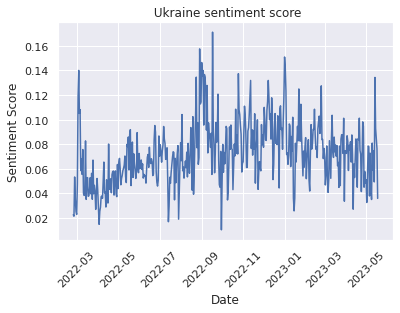

In [111]:
# Seaborn plot of sentiment data
sns.set()
plt.title(' Ukraine sentiment score')
plt.ylabel('Sentiment Score')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(tsdf.index,tsdf['result'], )
plt.savefig("ukraine_sent_time_series.png", dpi=300)

In [117]:
# Split the data in test and train data taking one year for training
train = tsdf[tsdf.index < pd.to_datetime("2023-03-01",format='%Y-%m-%d')]
test = tsdf[tsdf.index >= pd.to_datetime("2023-03-01",format='%Y-%m-%d')]

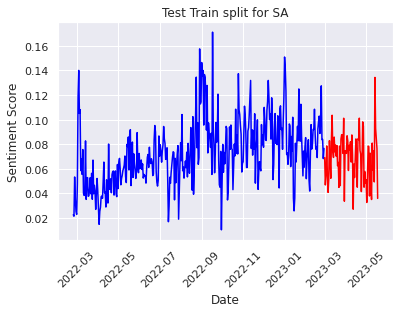

In [118]:
plt.title('Test Train split for SA')
plt.plot(train, color='blue')
plt.plot(test, color='red')
plt.ylabel('Sentiment Score')
plt.xlabel('Date')
plt.xticks(rotation=45)
#plt.plot(tsdf.index,tsdf['result'], )
plt.savefig("Test_Train_split_for_SA.png", dpi=300)

/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.39745D+00    |proj g|=  1.56765D+00

At iterate    5    f= -2.39784D+00    |proj g|=  6.76619D-01

At iterate   10    f= -2.40508D+00    |proj g|=  5.57511D+00

At iterate   15    f= -2.41144D+00    |proj g|=  3.96092D-03

At iterate   20    f= -2.41145D+00    |proj g|=  1.42689D-01

At iterate   25    f= -2.41253D+00    |proj g|=  9.78802D-01

At iterate   30    f= -2.41391D+00    |proj g|=  9.46940D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N 

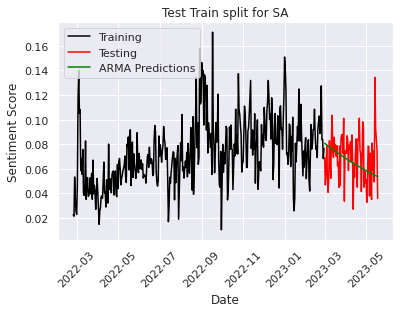

In [123]:
y = train['result']

ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], 
                                             end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_outARMA = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('Sentiment Score')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Test Train split for SA")
plt.plot(y_pred_outARMA, color='green', label = 'ARMA Predictions')
plt.legend()
plt.savefig("Test_Train_split_ARMA_Pred_SA.png", dpi=300)
plt.show()


In [124]:
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["result"].values, y_pred_df["Predictions"]))
print("ARMA RMSE: ",arma_rmse)

ARMA RMSE:  0.02078733662794378


In [129]:
ARIMAmodel = SARIMAX(y, order = (2, 2, 2))
#ARIMAmodel = SARIMAX(y, order = (2, 3, 2))
#ARIMAmodel = SARIMAX(y, order = (5, 4, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0],
                                              end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_outARIMA = y_pred_df["Predictions"]

/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.33019D+00    |proj g|=  4.46058D+00

At iterate    5    f= -2.33387D+00    |proj g|=  1.47422D+00

At iterate   10    f= -2.34153D+00    |proj g|=  4.97173D-01

At iterate   15    f= -2.34160D+00    |proj g|=  2.36609D-02

At iterate   20    f= -2.34160D+00    |proj g|=  2.23197D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     40      1     0     0   2.232D-02  -2.342D+00
  F =  -

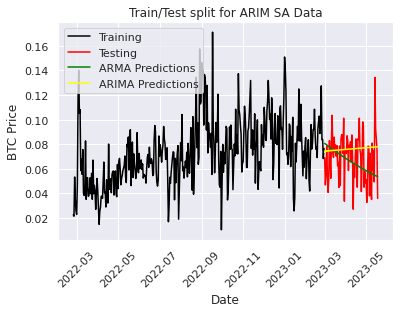

In [130]:
plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for ARIM SA Data")
plt.plot(y_pred_outARMA, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_outARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.legend()
plt.savefig("Test_Train_split_ARIM_Pred_SA.png", dpi=300)
plt.show()

In [131]:
arma_rmse = np.sqrt(mean_squared_error(test["result"].values, y_pred_df["Predictions"]))
print("ARIMA RMSE: ",arma_rmse)

ARIMA RMSE:  0.02082239002821455


In [142]:
# added enforce_stationarity=False to model definition to get around
# LU decomposition error ?
SARIMAXmodel = SARIMAX(y, order = (2,1,2), seasonal_order=(2,2,2,12),enforce_stationarity=False)
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0],
                                                end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_outSARIMAX = y_pred_df["Predictions"]

/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.56448D+00    |proj g|=  9.18488D+00

At iterate    5    f= -1.71251D+00    |proj g|=  3.90015D+00

At iterate   10    f= -1.72599D+00    |proj g|=  2.39865D+00

At iterate   15    f= -1.85381D+00    |proj g|=  5.47203D-01

At iterate   20    f= -1.86471D+00    |proj g|=  2.12693D-01

At iterate   25    f= -1.87287D+00    |proj g|=  7.65422D-02

At iterate   30    f= -1.87328D+00    |proj g|=  1.65132D-01

At iterate   35    f= -1.88319D+00    |proj g|=  1.50427D-01

At iterate   40    f= -1.88607D+00    |proj g|=  8.92703D-02

At iterate   45    f= -1.91020D+00    |proj g|=  5.30591D+00

At iterate   50    f= -1.92683D+00    |proj g|=  5.19077D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number

/home/hduser/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


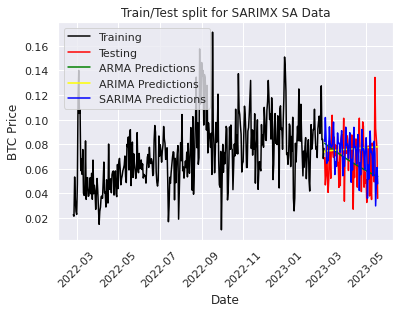

In [139]:
plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for SARIMX SA Data")
plt.plot(y_pred_outARMA, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_outARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_outSARIMAX, color='Blue', label = 'SARIMA Predictions')
plt.legend()
plt.savefig("Test_Train_split_SARIMX_Pred_SA.png", dpi=300)
plt.show()

In [140]:
arma_rmse = np.sqrt(mean_squared_error(test["result"].values, y_pred_df["Predictions"]))
print("SARIMA RMSE: ",arma_rmse)

SARIMA RMSE:  0.024233834817760914
